<a href="https://colab.research.google.com/github/heinrych/lia1-2023-1/blob/main/Entregas/Entrega_2_aula_1_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -Uqq duckduckgo_search

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

import socket,warnings
import os

In [ ]:
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("Sem conexão")

In [ ]:
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

In [ ]:
def search_images(term, max_images=200):
    
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('passaro photos', max_images=1)
urls[0]

'http://3.bp.blogspot.com/-b8q0dNvMRwY/UoiSer-0_vI/AAAAAAAABNc/wv_eEBWI3ig/s1600/Gouldian-Finch.jpg'

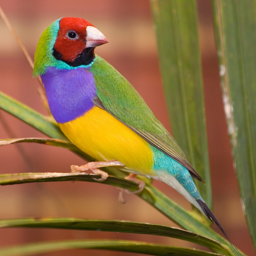

In [ ]:
dest = 'passaro.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

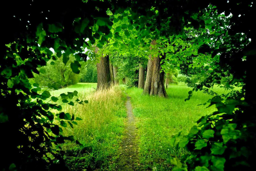

In [ ]:
download_url(search_images('fotos da floresta', max_images=1)[0], 'floresta.jpg', show_progress=False)
Image.open('floresta.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')

In [ ]:
print(searches)

('forest', 'bird')


In [ ]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(1)  
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(1)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(1)
    resize_images(path/o, max_size=400, dest=path/o)

## Passo 2 - treinando o modelo

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

98

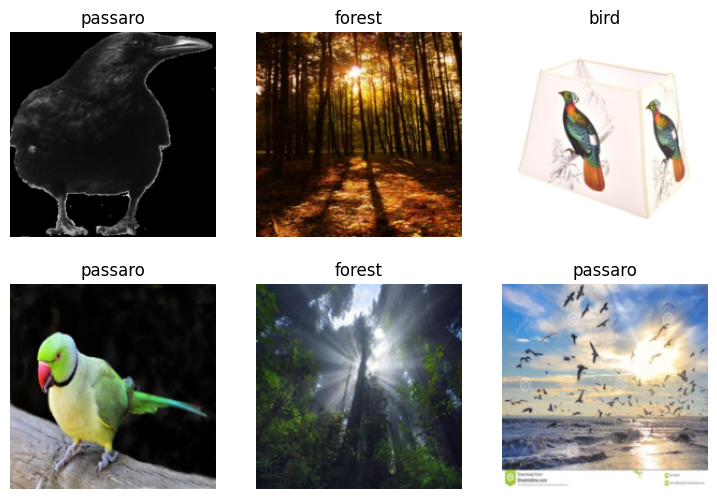

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 16.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.577552,1.203162,0.492239,02:13


epoch,train_loss,valid_loss,error_rate,time
0,1.020421,1.116168,0.465632,03:14
1,0.825619,1.160881,0.454545,03:12
2,0.642251,1.106252,0.450111,03:11


## Passo 3: Aplicando o modelo


In [ ]:
is_passaro,_,probs = learn.predict(PILImage.create('passaro.jpg'))
print(f"É um passarinho: {is_passaro}.")
print(f"%Probabilidade de ser um passarinho: {probs[0]:.4f}")

É um passarinho: passaro.
%Probabilidade de ser um passarinho: 0.0710


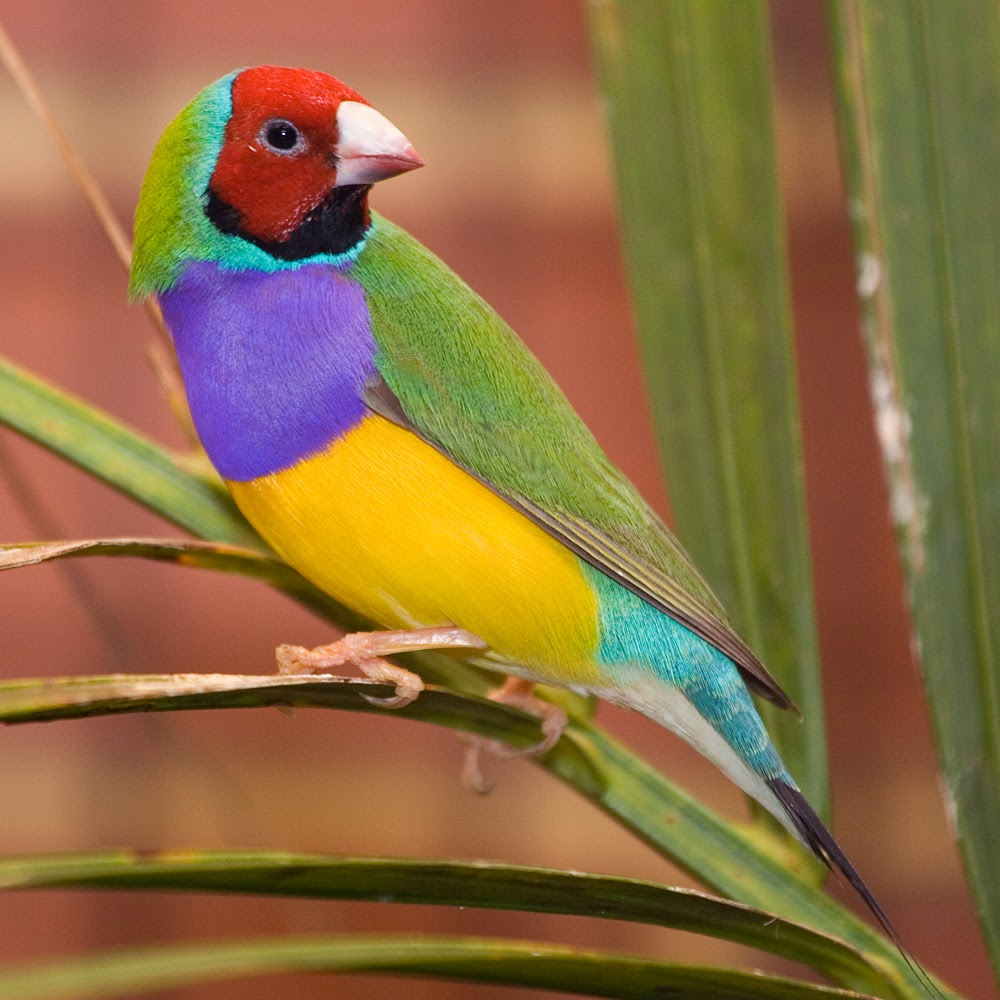

In [ ]:
PILImage.create('passaro.jpg')